# 💻 Creación del dataset para el modelo

El objetivo principal de este cuaderno es crear el dataset que utilizará nuestro modelo, de forma que, al recibir la imagen de un componente, pueda identificar correctamente qué tipo de componente es. 

**Segunda parte: descarga y organización de imágenes**

En esta segunda parte, automatizaremos la descarga de imágenes a partir de URLs y almacenaremos sus rutas locales en el dataset procesado.

### Importaciones

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
import time
from PIL import Image 
from PIL import ImageOps

### Carga del dataset base
Cargamos el dataset previamente generado en el cuaderno `dataset_01.ipynb`. Este dataset contiene la información de los componentes, incluyendo las URLs de las imágenes que vamos a descargar.

In [27]:
df = pd.read_csv('../data/processed/components_01.csv')
df

,image_url,label
0,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
1,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
2,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
3,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
4,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard
...,...,...
9977,https://cdna.pcpartpicker.com/static/forever/i...,hard_drive
9978,https://cdna.pcpartpicker.com/static/forever/i...,hard_drive
9979,https://cdna.pcpartpicker.com/static/forever/i...,hard_drive
9980,https://m.media-amazon.com/images/I/31s-wKnYDv...,hard_drive


### Descarga de imágenes y generación de rutas locales
Definimos una función para descargar imágenes a partir de una URL y guardarlas localmente con un nombre específico. Esto nos permitirá asociar cada imagen con su ruta local en el dataset.

Creamos la carpeta de imágenes si no existe y recorremos el dataset descargando cada imagen. Guardamos la ruta local de cada imagen para su posterior uso en el modelo.

In [ ]:
def download_img(url, filename):
    """Función para descargar una imagen desde una URL y guardarla localmente."""
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        with open(filename, 'wb') as f:
            f.write(response.content)
        return filename
    except Exception as e:
        print(f"Error downloading {url}: {e}")
        return None

In [ ]:
img_dir = '../data/images'
os.makedirs(img_dir, exist_ok=True)

local_paths = []
for idx, row in df.iterrows():
    url = row['image_url']
    label = row['label']
    ext = os.path.splitext(url)[-1].split('?')[0]
    filename = f"{label}_{idx}{ext if ext else '.jpg'}"
    filepath = os.path.join(img_dir, filename)
    local_path = download_img(url, filepath)
    local_paths.append(local_path)
    time.sleep(0.1)

Error downloading https://thumb.pccomponentes.com/w-530-530/articles/39/398851/1888-asrock-b550m-phantom-gaming-4.jpg: 404 Client Error: Not Found for url: https://thumb.pccomponentes.com/w-530-530/articles/39/398851/1888-asrock-b550m-phantom-gaming-4.jpg
Error downloading https://thumb.pccomponentes.com/w-530-530/articles/1066/10661014/productimage6-93884767-f415-4d6a-a72a-b7d5adc165ce.jpg: 404 Client Error: Not Found for url: https://thumb.pccomponentes.com/w-530-530/articles/1066/10661014/productimage6-93884767-f415-4d6a-a72a-b7d5adc165ce.jpg
Error downloading https://thumb.pccomponentes.com/w-530-530/articles/1066/10661027/productimage6-da22a662-c9cd-4d19-8092-980015d17eb9.jpg: 404 Client Error: Not Found for url: https://thumb.pccomponentes.com/w-530-530/articles/1066/10661027/productimage6-da22a662-c9cd-4d19-8092-980015d17eb9.jpg
Error downloading https://thumb.pccomponentes.com/w-530-530/articles/1038/10384667/productimage6-5d642cbb-79c0-4294-b8d0-57a783e28fbe.jpg: 404 Client Er

,image_url,label,local_image_path
0,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_0.jpg
1,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_1.jpg
2,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_2.jpg
3,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_3.jpg
4,https://thumb.pccomponentes.com/w-530-530/arti...,motherboard,../data/images\motherboard_4.jpg


### Guardado del dataset
Añadimos la columna con la ruta local de cada imagen al DataFrame y guardamos el nuevo dataset procesado. (Para asegurar el proceso debido al tiempo que supone la descarga de todas las imágenes).

In [ ]:
df['local_image_path'] = local_paths
df.to_csv('../data/processed/components_01_with_local_paths.csv', index=False)

## Descripción de los datos

Este dataset contiene **9982 registros**. Disponemos del **tipo de componente** (`label`), que será el *target* de nuestro modelo inicial, así como la URL de la imagen (`image_url`) y la ruta local (`local_image_path`), aunque mantiene fallos por temas de barras y valores nulos, que ahora arreglaremos.

| #  | Columnas           | Non-Null Count | Tipos |
|----|-----------------|----------------|-------|
| 0  | image_url        | 9982           | str   |
| 1  | label            | 9982           | str   |
| 2  | local_image_path | 9971           | str   |

In [36]:
df_02 = pd.read_csv('../data/processed/components_01_with_local_paths.csv')
df_02.info()

<class 'pandas.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   image_url         9982 non-null   str  
 1   label             9982 non-null   str  
 2   local_image_path  9971 non-null   str  
dtypes: str(3)
memory usage: 234.1 KB


### Valores nulos
Identificamos y eliminamos los registros que contienen valores nulos. Estos valores proceden de fallos de descarga durante el proceso de obtención de las imágenes, debido a la inexistencia de las mismas. Dado que no disponemos de imágenes que identifiquen nuestros componentes, prescindimos de esos registros.

In [37]:
df_02.isnull().sum()

image_url            0
label                0
local_image_path    11
dtype: int64

In [38]:
df_02 = df_02.dropna().reset_index(drop=True)
df_02.isnull().sum()

image_url           0
label               0
local_image_path    0
dtype: int64

### Normalización de rutas locales de imágenes
Ajustamos el formato de las rutas locales de las imágenes y arreglamos los problemas con las barras, para que sean rutas relativas sin errores. Esto facilita el acceso a las imágenes.

In [39]:
df_02["local_image_path"]

0         ../data/images\motherboard_0.jpg
1         ../data/images\motherboard_1.jpg
2         ../data/images\motherboard_2.jpg
3         ../data/images\motherboard_3.jpg
4         ../data/images\motherboard_4.jpg
                       ...                
9966    ../data/images\hard_drive_9977.jpg
9967    ../data/images\hard_drive_9978.jpg
9968    ../data/images\hard_drive_9979.jpg
9969    ../data/images\hard_drive_9980.jpg
9970    ../data/images\hard_drive_9981.jpg
Name: local_image_path, Length: 9971, dtype: str

In [40]:
df_02["local_image_path"] = df_02["local_image_path"].str.replace(r'\\', '/', regex=True)
df_02["local_image_path"] = df_02["local_image_path"].apply(
    lambda x: x.replace("../data/images", "./data/images")
)
df_02["local_image_path"]

0         ./data/images/motherboard_0.jpg
1         ./data/images/motherboard_1.jpg
2         ./data/images/motherboard_2.jpg
3         ./data/images/motherboard_3.jpg
4         ./data/images/motherboard_4.jpg
                      ...                
9966    ./data/images/hard_drive_9977.jpg
9967    ./data/images/hard_drive_9978.jpg
9968    ./data/images/hard_drive_9979.jpg
9969    ./data/images/hard_drive_9980.jpg
9970    ./data/images/hard_drive_9981.jpg
Name: local_image_path, Length: 9971, dtype: str

### Eliminar la columna `image_url`
Eliminamos la columna de la URL original de la imagen, ya que ahora solo necesitamos la ruta local. Comprobamos la estructura final del DataFrame para asegurarnos de que está listo.

In [41]:
df_02 = df_02.drop(columns=["image_url"])
df_02.info()

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   label             9971 non-null   str  
 1   local_image_path  9971 non-null   str  
dtypes: str(2)
memory usage: 155.9 KB


### Guardar el dataset
Guardamos el DataFrame final en un archivo CSV. Este archivo contiene únicamente las columnas necesarias: la etiqueta del componente y la ruta local de la imagen.

In [3]:
df_02 = pd.read_csv('../data/processed/components_01_with_local_paths.csv')

In [4]:
df_02.to_csv('../data/processed/components_02.csv', index=False)

In [6]:
df_data = pd.read_csv('../data/processed/components_02.csv')

### Optimizar las imágenes

En este apartado se hará que todas las imágenes tengan la misma proporción y las vetorizaremos.

In [5]:
target_size = (530, 530)

data = []

for idx, row in df_data.iterrows():
    path = row["local_image_path"]
    label = row["label"]
    
    img = Image.open(path).convert("RGB")
    img_resized = ImageOps.fit(img, target_size, Image.Resampling.LANCZOS)
    img_vector = np.array(img_resized).flatten()
    
    data.append([label, img_vector])

df_vector = pd.DataFrame(data, columns=["label", "image"])


In [6]:
df_vector.info()

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   9971 non-null   str   
 1   image   9971 non-null   object
dtypes: object(1), str(1)
memory usage: 155.9+ KB


In [7]:
df_vector

,label,image
0,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
1,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
3,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
4,motherboard,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
...,...,...
9966,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
9967,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
9968,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
9969,hard_drive,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


Si probamos con una imagen, por ejemplo este procesador, podemos ver que la imagen se guarda perfectamente.

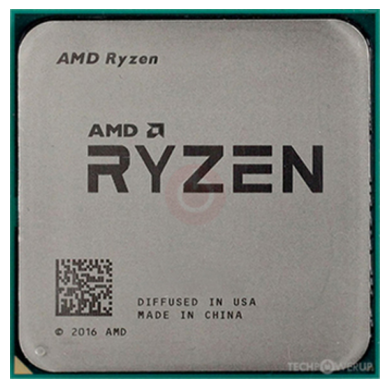

In [10]:
vector = df_vector["image"].iloc[9120]
img_array = np.array(vector, dtype=np.uint8).reshape((530, 530, 3))

plt.imshow(img_array)
plt.axis('off')
plt.show()

## Transformar la etiqueta a números

Para que sea más eficiente, transforma la columna `label` a números.

| Número | Componente       |
|--------|-----------------|
| 0      | motherboard     |
| 1      | gpu             |
| 2      | cpu             |
| 3      | hard_drive      |
| 4      | ram             |
| 5      | pc_case         |
| 6      | power_supply    |
| 7      | liquid_cooling  |
| 8      | case_fan        |
| 9      | cpu_fan         |
| 10     | sound_card      |

In [11]:
df_vector["label_num"], label_mapping = pd.factorize(df_vector["label"])
label_map = {i: name for i, name in enumerate(label_mapping)}

print(label_map)


{0: 'motherboard', 1: 'gpu', 2: 'cpu', 3: 'hard_drive', 4: 'ram', 5: 'pc_case', 6: 'power_supply', 7: 'liquid_cooling', 8: 'case_fan', 9: 'cpu_fan', 10: 'sound_card'}


In [12]:
df_vector.info()

<class 'pandas.DataFrame'>
RangeIndex: 9971 entries, 0 to 9970
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      9971 non-null   str   
 1   image      9971 non-null   object
 2   label_num  9971 non-null   int64 
dtypes: int64(1), object(1), str(1)
memory usage: 233.8+ KB


Ahora se borrará el label original y se cambiará el nombre al numérico.

In [13]:
df_vector = df_vector.drop(columns=["label"])
df_vector = df_vector.rename(columns={"label_num": "label"})

## Guardamos el dataset

A continuación guardamos el dataset final en un archivo CSV para poder usarlo en otros cuadernos.

In [17]:
df_vector.to_csv("../data/processed/dataset_vectorized.csv", index=False)

## Conclusiones

Hemos preparado un dataset que contiene **la etiqueta `label`** de cada componente y la **imagen vectorizada `image`**.

Con este dataset ya podríamos trabajar con los modelos.